# Model 3: Biased transmission (direct / content bias)

original: https://bookdown.org/amesoudi/ABMtutorial_bookdown/model3.html

### Note

- Biased transmission occurs when one trait or one demonstrator is more likely to be copied than another trait or demonstrator.
    - Trait-based copying is often called ‘direct’ or ‘content’ bias.
    - Demonstrator-based copying is often called ‘indirect’ or ‘context’ bias.
    - Both are sometimes also called ‘cultural selection’.
- There are two traits $A$ and $B$.
    - Transmission favours trait $A$.
        - (Perhaps $A$ is a more effective tool, more memorable story, or more easily pronounced word.)
- Mutation rate = 0, so we need to include some $A$s at the beginning.
- Each agent chooses another agent from the previous generation at random.
    - If that chosen agent possesses trait $A$, then the focal agent copies trait $A$ with probability $s$.
        - $s$: the strength of biased transmission, or the probability that an agent ($B$) encountering another agent ($A$) changes the trait.

In [1]:
include("src/Agent.jl")
include("src/Output.jl")
using .Agent
using .Output

In [2]:
make_agent_df = Agent.make_agent_AB_df;

In [3]:
function biased_transmission(; N::Int64, r_max::Int64, t_max::Int64, p_0::Float64, s::Float64)
    # N: population
    # r_max: number of independent runs
    # t_max: max of generations (t)
    # p_0: the initial proportion of A
    # s: the strength of biased transmission
    output_df = make_output_df(r_max, t_max)

    for r = 1:r_max
        agent_df = make_agent_df(N, p_0)

        for t = 1:t_max
            if t > 1
                previous_traits = agent_df.trait
                demonstrator_traits = rand(agent_df.trait, N)
                new_traits = [prev_t == B && demo_t == A && s > rand() ? demo_t : prev_t
                    for (prev_t, demo_t) in zip(previous_traits, demonstrator_traits)]
                agent_df.trait = new_traits
            end

            # get p and put it into the output slot for this generation t
            row_num = t + (r - 1) * t_max
            output_df.r[row_num] = r
            output_df.t[row_num] = t
            output_df.p[row_num] = trait_ratio(agent_df, A)
        end
    end
    
    plot_A(output_df, "N = $N, p_0 = $p_0, s = $s")
end;

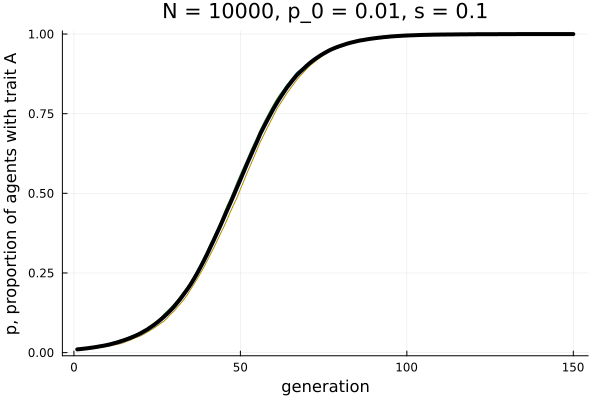

In [4]:
biased_transmission(N = 10^4, r_max = 5, t_max = 150, p_0 = 0.01, s = 0.1)

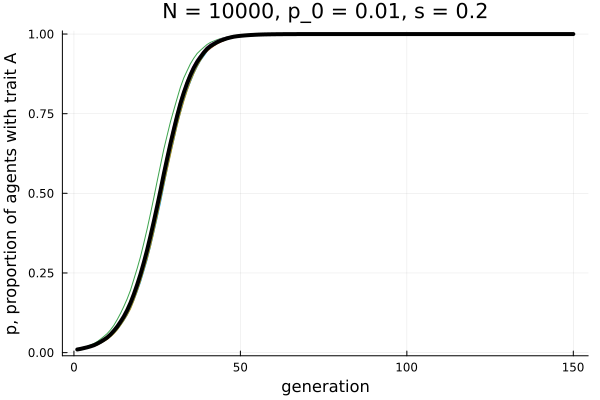

In [5]:
biased_transmission(N = 10^4, r_max = 5, t_max = 150, p_0 = 0.01, s = 0.2)

### Note

- Biased transmission differs in its dynamics from biased mutation.
- Its action is proportional to the variation in the population at the time at which it acts.
- It is strongest when there is lots of variation, and weakest when there is little variation.
- This generates an s-shaped pattern of diffusion over time.
- We should also be cautious not to jump to conclusions.
    - Many processes generate s-shaped diffusion curves, not just biased transmission, including sometimes purely individual-level biased mutation (Reader 2004; Hoppitt et al. 2010).

## Exercises 2

In [6]:
function biased_transmission(; N::Int64, r_max::Int64, t_max::Int64, p_0::Float64, s_a::Float64, s_b::Float64)
    # N: population
    # r_max: number of independent runs
    # t_max: max of generations (t)
    # p_0: the initial proportion of A
    # s: the strength of biased transmission
    output_df = make_output_df(r_max, t_max)

    for r = 1:r_max
        agent_df = make_agent_df(N, p_0)

        for t = 1:t_max
            if t > 1
                previous_traits = agent_df.trait
                demonstrator_traits = rand(agent_df.trait, N)
                new_traits = [prev_t == B && demo_t == A && s_a > rand() ? demo_t : prev_t for (prev_t, demo_t) in zip(previous_traits, demonstrator_traits)]
                new_traits = [new_t == A && demo_t == B && s_b > rand() ? demo_t : new_t for (new_t, demo_t) in zip(new_traits, demonstrator_traits)]
                agent_df.trait = new_traits
            end

            # get p and put it into the output slot for this generation t
            row_num = t + (r - 1) * t_max
            output_df.r[row_num] = r
            output_df.t[row_num] = t
            output_df.p[row_num] = trait_ratio(agent_df, A)
        end
    end

    plot_A(output_df, "N = $N, p_0 = $p_0, s_a = $s_a, s_b = $s_b")
end;

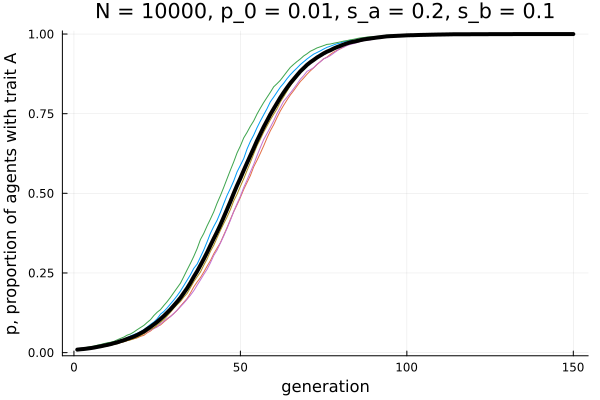

In [7]:
biased_transmission(N = 10^4, r_max = 5, t_max = 150, p_0 = 0.01, s_a = 0.2, s_b = 0.1)

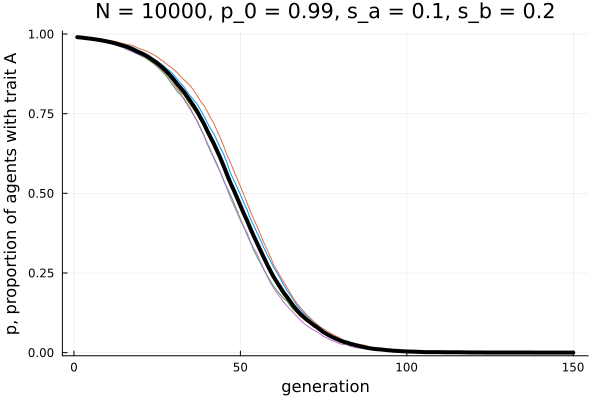

In [8]:
biased_transmission(N = 10^4, r_max = 5, t_max = 150, p_0 = 0.99, s_a = 0.1, s_b = 0.2)

## Analytical Solution

- $p$: proportion of A in current generation ($1 \ge p \ge 0$).
- $p'$: $p$ in next generation.
- $p^*$: equilibrium of $p$.
- $s$: strength of biased transmission. ($1 \ge s > 0$)

$p' = p + p (1 - p) s$

$p^* = p^* + p^* (1 - p^*) s$

$p^* (1 - p^*) s = 0$

$\therefore p^* = 0, 1$

- We can say that $p = 0$ is an unstable equilibrium, meaning that any slight perturbation away from $p = 0$ moves $p$ away from that value.
- In contrast, $p = 1$ is a stable equilibrium: any slight perturbation from $p = 1$ immediately goes back to $p = 1$.